In [172]:
import pandas as pd
import matplotlib as plt

import scipy.stats as stats

In [173]:
col_names_for_s1_s2 = ["run_number", "initial_population", "max_metabolism", "max_vision", 
             "step", "count_turtles", "mean_metabolism", "mean_vision", 
             "mean_sugar", "count_turtles_ratio", "gini_index"]

col_names_for_s3 = ["run_number", "growback_rate", "min_death_age", "initial_population", "max_vision", "max_metabolism",
             "step", "count_turtles", "mean_metabolism", "mean_vision", "mean_sugar", "prevalence_of_poverty_death", "prevalence_of_aging_death", 
             "count_turtles_ratio", "gini_index", "percentage_of_child_poverty", "percentage_of_sugar_controlled_by_rich"]

In [174]:
s1 = pd.read_csv("https://github.com/wbwhaha/ABM_Assignment_1_Sugarscape/raw/refs/heads/main/Behaviorspace%20Output/Sugarscape%201%20Immediate%20Growback_demo%20Final_s1-table.csv",
                 skiprows=6,
                 names=col_names_for_s1_s2)
s2 = pd.read_csv("https://github.com/wbwhaha/ABM_Assignment_1_Sugarscape/raw/refs/heads/main/Behaviorspace%20Output/Sugarscape%202%20Constant%20Growback_demo%20Final_s2-table.csv",
                 skiprows=6,
                 names=col_names_for_s1_s2)
s3 = pd.read_csv("https://github.com/wbwhaha/ABM_Assignment_1_Sugarscape/raw/refs/heads/main/Behaviorspace%20Output/Sugarscape%203%20Wealth%20Distribution_demo%20Final_s3-table.csv",
                 skiprows=6,
                 names=col_names_for_s3)

C:\Users\wbwha\AppData\Local\Temp\ipykernel_7164\2955394751.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  s3 = pd.read_csv("https://github.com/wbwhaha/ABM_Assignment_1_Sugarscape/raw/refs/heads/main/Behaviorspace%20Output/Sugarscape%203%20Wealth%20Distribution_demo%20Final_s3-table.csv",


In [175]:
s1 = s1.iloc[1:].reset_index(drop=True)
s2 = s2.iloc[1:].reset_index(drop=True)
s3 = s3.iloc[1:].reset_index(drop=True)
s1.drop(columns=['run_number', 'count_turtles', 'count_turtles_ratio'], inplace=True)
s2.drop(columns=['run_number', 'count_turtles', 'count_turtles_ratio'], inplace=True)
s3.drop(columns=['run_number', 'count_turtles', 'count_turtles_ratio'], inplace=True)

In [176]:
s1 = s1.applymap(lambda x: pd.to_numeric(x, errors="coerce"))
s2 = s2.applymap(lambda x: pd.to_numeric(x, errors="coerce"))
s3 = s3.applymap(lambda x: pd.to_numeric(x, errors="coerce"))

C:\Users\wbwha\AppData\Local\Temp\ipykernel_7164\4194646026.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  s1 = s1.applymap(lambda x: pd.to_numeric(x, errors="coerce"))
C:\Users\wbwha\AppData\Local\Temp\ipykernel_7164\4194646026.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  s2 = s2.applymap(lambda x: pd.to_numeric(x, errors="coerce"))
C:\Users\wbwha\AppData\Local\Temp\ipykernel_7164\4194646026.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  s3 = s3.applymap(lambda x: pd.to_numeric(x, errors="coerce"))


In [177]:
s1_grouped = s1.groupby("step").mean().reset_index()
s2_grouped = s2.groupby("step").mean().reset_index()


In [178]:
s1_grouped

,step,initial_population,max_metabolism,max_vision,mean_metabolism,mean_vision,mean_sugar,gini_index
0,0,400.0,4.0,6.0,2.49025,3.51225,12.39575,0.345446
1,1,400.0,4.0,6.0,2.46050,3.52250,12.92975,0.321213
2,2,400.0,4.0,6.0,2.42975,3.52825,13.34675,0.316039
3,3,400.0,4.0,6.0,2.41050,3.54000,13.79700,0.316526
4,4,400.0,4.0,6.0,2.38425,3.55875,14.36000,0.321204
...,...,...,...,...,...,...,...,...
996,996,400.0,4.0,6.0,1.98400,3.77625,1021.12750,0.504710
997,997,400.0,4.0,6.0,1.98400,3.77625,1022.14600,0.504714
998,998,400.0,4.0,6.0,1.98400,3.77625,1023.16450,0.504719
999,999,400.0,4.0,6.0,1.98400,3.77625,1024.18300,0.504723


In [179]:
s2_grouped

,step,initial_population,max_metabolism,max_vision,mean_metabolism,mean_vision,mean_sugar,gini_index
0,0,400.0,4.0,6.0,2.50875,3.46325,12.29525,0.350247
1,1,400.0,4.0,6.0,2.47175,3.47150,12.81775,0.324801
2,2,400.0,4.0,6.0,2.44475,3.47675,13.17075,0.320323
3,3,400.0,4.0,6.0,2.41700,3.49650,13.62475,0.318697
4,4,400.0,4.0,6.0,2.39450,3.51525,13.97225,0.322383
...,...,...,...,...,...,...,...,...
996,996,400.0,4.0,6.0,1.47575,3.61300,910.20575,0.354235
997,997,400.0,4.0,6.0,1.47575,3.61300,911.12325,0.354238
998,998,400.0,4.0,6.0,1.47575,3.61300,912.04525,0.354230
999,999,400.0,4.0,6.0,1.47575,3.61300,912.96275,0.354225


In [180]:
s3

,growback_rate,min_death_age,initial_population,max_vision,max_metabolism,step,mean_metabolism,mean_vision,mean_sugar,prevalence_of_poverty_death,prevalence_of_aging_death,gini_index,percentage_of_child_poverty,percentage_of_sugar_controlled_by_rich
0,1,1,100,2,2,0,1.450,1.450,12.570,0.000000,0.000000,0.352530,1.000,0.369133
1,1,1,100,2,4,0,2.600,1.550,11.760,0.000000,0.000000,0.369932,1.000,0.381803
2,1,1,100,2,4,0,2.340,1.470,12.640,0.000000,0.000000,0.346092,1.000,0.366297
3,1,1,100,2,2,0,1.510,1.510,13.710,0.000000,0.000000,0.323567,1.000,0.344274
4,1,1,100,2,2,0,1.420,1.380,12.990,0.000000,0.000000,0.317667,1.000,0.351039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621615,3,60,1000,10,10,996,2.392,5.972,42.083,0.795130,0.204870,0.516194,0.645,0.536060
1621616,3,60,1000,10,10,997,2.368,5.980,41.961,0.795085,0.204915,0.518419,0.645,0.537499
1621617,3,60,1000,10,10,998,2.390,5.953,41.604,0.795065,0.204935,0.519397,0.640,0.538073
1621618,3,60,1000,10,10,999,2.368,5.953,41.628,0.794995,0.205005,0.520088,0.645,0.539469


In [181]:
s3_origin = s3[(s3['growback_rate'] == 1) &
                (s3['min_death_age'] == 60) &
                (s3['initial_population'] == 400) &
                (s3['max_vision'] == 6) &
                (s3['max_metabolism'] == 4)]

In [182]:
s3_origin_grouped = s3_origin.groupby("step").mean().reset_index()

In [183]:
s3_origin_grouped

,step,growback_rate,min_death_age,initial_population,max_vision,max_metabolism,mean_metabolism,mean_vision,mean_sugar,prevalence_of_poverty_death,prevalence_of_aging_death,gini_index,percentage_of_child_poverty,percentage_of_sugar_controlled_by_rich
0,0,1.0,60.0,400.0,6.0,4.0,2.47125,3.46400,12.47150,0.000000,0.000000,0.350714,1.00000,0.368004
1,1,1.0,60.0,400.0,6.0,4.0,2.43150,3.48200,13.15250,1.000000,0.000000,0.319333,1.00000,0.353874
2,2,1.0,60.0,400.0,6.0,4.0,2.39975,3.49175,13.59600,1.000000,0.000000,0.312246,1.00000,0.353194
3,3,1.0,60.0,400.0,6.0,4.0,2.37475,3.50150,13.94925,1.000000,0.000000,0.316519,1.00000,0.358882
4,4,1.0,60.0,400.0,6.0,4.0,2.34650,3.52325,14.35175,1.000000,0.000000,0.319497,1.00000,0.363102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,1.0,60.0,400.0,6.0,4.0,1.79500,3.64775,42.45625,0.566013,0.434564,0.476759,0.53375,0.496990
997,997,1.0,60.0,400.0,6.0,4.0,1.79200,3.65825,42.71175,0.566019,0.434558,0.477176,0.52750,0.496865
998,998,1.0,60.0,400.0,6.0,4.0,1.79150,3.65800,42.75550,0.565999,0.434577,0.476941,0.53250,0.496298
999,999,1.0,60.0,400.0,6.0,4.0,1.79450,3.65225,42.59075,0.565961,0.434614,0.475925,0.52750,0.495097


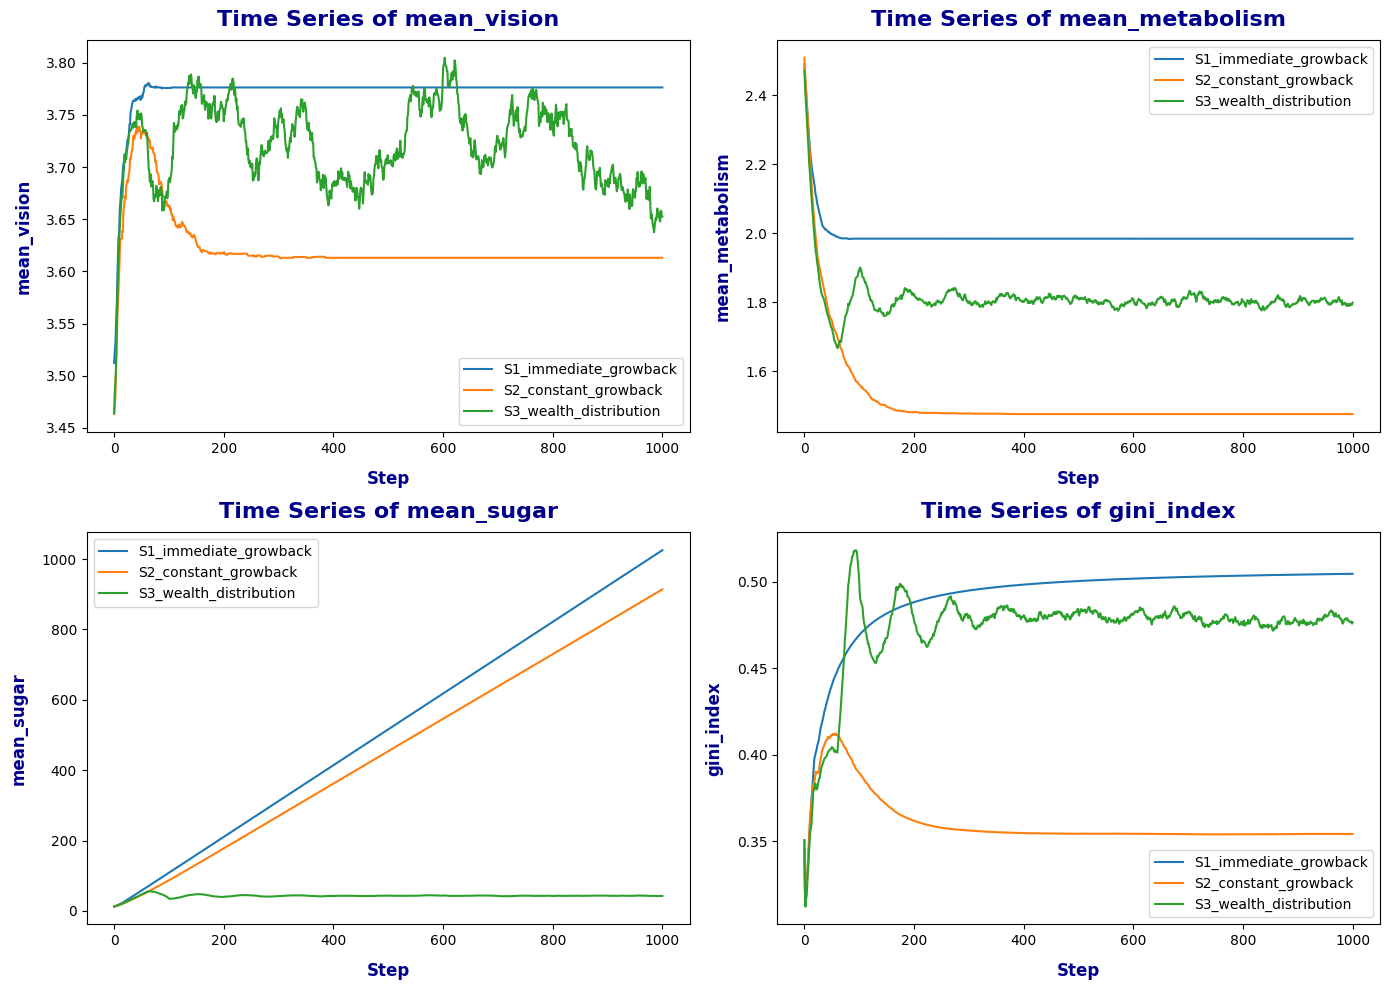

In [185]:
import matplotlib.pyplot as plt

# List of columns to plot
columns = ["mean_vision", "mean_metabolism", "mean_sugar", "gini_index"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Iterate through each column and corresponding subplot
for col, ax in zip(columns, axes.flatten()):
    for model, df in zip(["S1_immediate_growback", "S2_constant_growback", "S3_wealth_distribution"], [s1_grouped, s2_grouped, s3_origin_grouped]):
        ax.plot(df["step"], df[col], label=f"{model}")
    ax.set_xlabel("Step", fontsize=12, fontweight='bold', color='darkblue', labelpad=10)
    ax.set_ylabel(col, fontsize=12, fontweight='bold', color='darkblue', labelpad=10)
    ax.set_title(f"Time Series of {col}", fontsize=16, fontweight='bold', color='darkblue', pad=10)
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [211]:
from scipy.stats import f_oneway

for col in ["mean_vision", "mean_metabolism", "mean_sugar", "gini_index"]:
    stat, p_value = f_oneway(s1_grouped[col], s2_grouped[col], s3_origin_grouped[col])
    print(f"ANOVA test for {col}: stat = {stat} p-value = {p_value}")

for col in ["mean_vision", "mean_metabolism", "mean_sugar", "gini_index"]:
    print(f"Mean of {col} in s1 is {s1_grouped[col].mean()}")
    print(f"Mean of {col} in s2 is {s2_grouped[col].mean()}")
    print(f"Mean of {col} in s3 is {s3_origin_grouped[col].mean()}")

ANOVA test for mean_vision: stat = 5865.943668684647 p-value = 0.0
ANOVA test for mean_metabolism: stat = 7500.206183759171 p-value = 0.0
ANOVA test for mean_sugar: stat = 1269.8923910232852 p-value = 0.0
ANOVA test for gini_index: stat = 9491.43147364377 p-value = 0.0
Mean of mean_vision in s1 is 3.772507992007991
Mean of mean_vision in s2 is 3.6220474525474526
Mean of mean_vision in s3 is 3.720437062937063
Mean of mean_metabolism in s1 is 1.991556693306694
Mean of mean_metabolism in s2 is 1.514038961038961
Mean of mean_metabolism in s3 is 1.8111153846153847
Mean of mean_sugar in s1 is 516.0080996503497
Mean of mean_sugar in s2 is 454.5184687812188
Mean of mean_sugar in s3 is 42.4201918081918
Mean of gini_index in s1 is 0.49109923321931204
Mean of gini_index in s2 is 0.360504290469595
Mean of gini_index in s3 is 0.4728149333588104


In [187]:
s3_grouped_fianl = s3.groupby(["step", "growback_rate", "min_death_age", "initial_population", 
                         "max_vision", "max_metabolism"]).mean().reset_index()


<Figure size 1000x500 with 0 Axes>

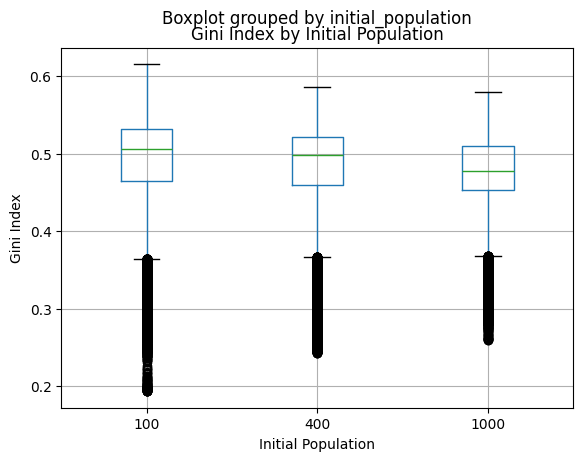

<Figure size 1000x500 with 0 Axes>

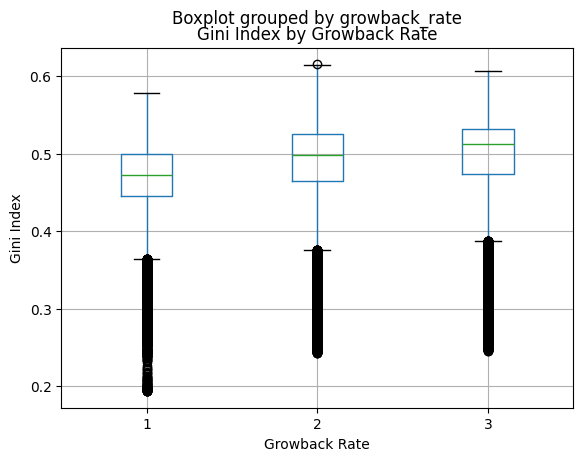

In [188]:
# Box plot for Gini Index by different Initial Population settings
plt.figure(figsize=(10, 5))
s3_grouped_fianl.boxplot(column='gini_index', by='initial_population')
plt.title('Gini Index by Initial Population')
plt.xlabel('Initial Population')
plt.ylabel('Gini Index')
plt.show()

# Box plot for Gini Index by different Growback Rate settings
plt.figure(figsize=(10, 5))
s3_grouped_fianl.boxplot(column='gini_index', by='growback_rate')
plt.title('Gini Index by Growback Rate')
plt.xlabel('Growback Rate')
plt.ylabel('Gini Index')
plt.show()


In [189]:
import scipy.stats as stats

# ANOVA test for Gini Index across different Initial Population levels
anova_results = stats.f_oneway(
    s3_grouped_fianl[s3_grouped_fianl['initial_population'] == 100]['gini_index'],
    s3_grouped_fianl[s3_grouped_fianl['initial_population'] == 400]['gini_index'],
    s3_grouped_fianl[s3_grouped_fianl['initial_population'] == 1000]['gini_index']
)
print("ANOVA test results for Gini Index across Initial Population levels: F-statistic = {:.2f}, p-value = {:.3f}".format(anova_results.statistic, anova_results.pvalue))


ANOVA test results for Gini Index across Initial Population levels: F-statistic = 1332.14, p-value = 0.000


In [190]:
s3_inintial_population = s3_grouped_fianl[(s3_grouped_fianl['growback_rate'] == 1) &
                (s3_grouped_fianl['min_death_age'] == 60) &
                (s3_grouped_fianl['max_vision'] == 6) &
                (s3_grouped_fianl['max_metabolism'] == 4)]

In [191]:
s3_inintial_population

,step,growback_rate,min_death_age,initial_population,max_vision,max_metabolism,mean_metabolism,mean_vision,mean_sugar,prevalence_of_poverty_death,prevalence_of_aging_death,gini_index,percentage_of_child_poverty,percentage_of_sugar_controlled_by_rich
31,0,1,60,100,6,4,2.47600,3.55200,12.96200,0.000000,0.000000,0.328353,1.0000,0.351762
40,0,1,60,400,6,4,2.47125,3.46400,12.47150,0.000000,0.000000,0.350714,1.0000,0.368004
49,0,1,60,1000,6,4,2.48890,3.50530,12.50010,0.000000,0.000000,0.347885,1.0000,0.367375
193,1,1,60,100,6,4,2.41800,3.56600,13.66700,1.000000,0.000000,0.297432,1.0000,0.339310
202,1,1,60,400,6,4,2.43150,3.48200,13.15250,1.000000,0.000000,0.319333,1.0000,0.353874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161878,999,1,60,400,6,4,1.79450,3.65225,42.59075,0.565961,0.434614,0.475925,0.5275,0.495097
161887,999,1,60,1000,6,4,1.58080,3.75050,26.48120,0.730911,0.270007,0.468415,0.4750,0.492317
162031,1000,1,60,100,6,4,2.09900,3.75900,60.26300,0.392889,0.607335,0.478683,0.5550,0.495442
162040,1000,1,60,400,6,4,1.79900,3.65250,42.54900,0.565903,0.434672,0.476550,0.5200,0.495199


In [192]:
output_list = ['gini_index', 'percentage_of_child_poverty', 'percentage_of_sugar_controlled_by_rich']

In [193]:
def compare_plot(df, a, b, c, d):
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    # Iterate through each column and corresponding subplot
    for col, ax in zip(b, axes.flatten()):
        for n in [c, d]:
            ax.plot(df.loc[df[a] == n, "step"], df.loc[df[a] == n, col], label=f"{a} = {n}")
        ax.set_xlabel("Step", fontsize=10, fontweight='bold', color='darkblue', labelpad=10)
        ax.set_ylabel(col, fontsize=10, fontweight='bold', color='darkblue', labelpad=10)
        ax.set_title(f"Time Series of {col}\n (Sugarscape3 Wealth Distribution)", fontsize=12, fontweight='bold', color='darkblue', pad=10)
        ax.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [194]:
def Wilcoxon_rank_sum(df, a, b, c, d):

    # Perform the Wilcoxon rank-sum test
    statistic, p_value = stats.ranksums(df[df[a] == c][b],
                                        df[df[a] == d][b])
    print((df[df[a] == c][b]).mean())
    print((df[df[a] == d][b]).mean())
    # Print results
    print("Statistic:", statistic)
    print("P-value:", p_value)

    # Interpretation
    if p_value < 0.05:
        print(f"There is a significant difference in {b} between the groups because of {a}.")
    else:
        print(f"No significant difference in {b} between the groups because of {a}.")

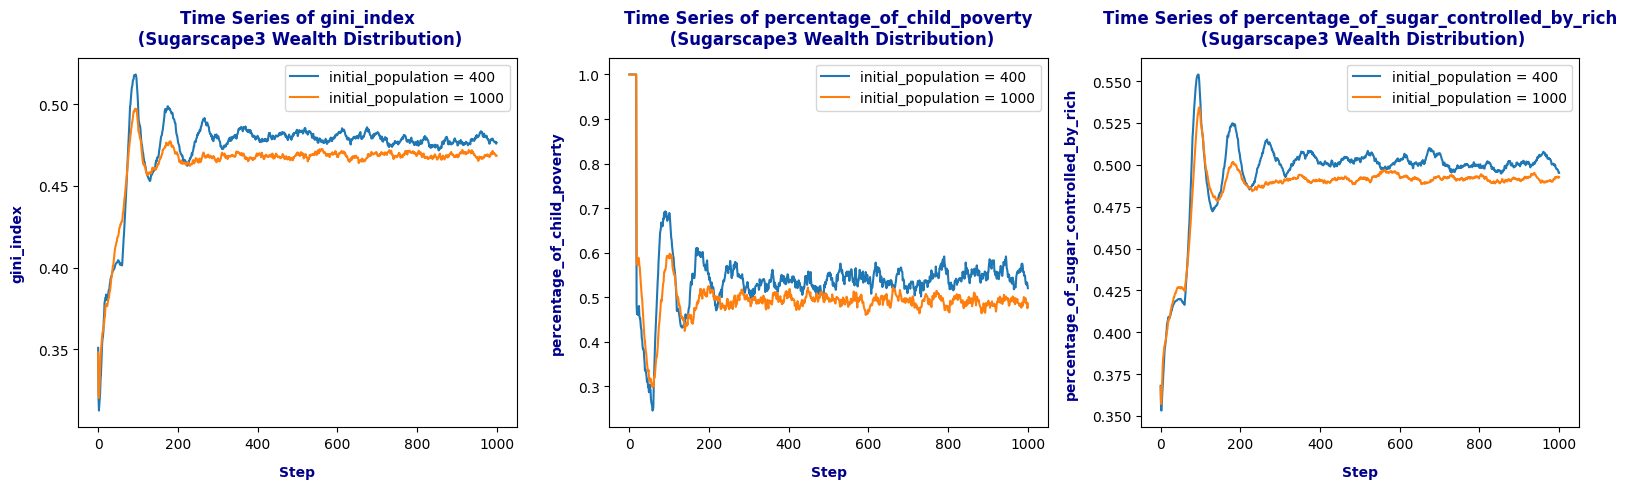

In [195]:
compare_plot(s3_inintial_population, 'initial_population', output_list, 400, 1000)

In [196]:
for output in output_list:
    Wilcoxon_rank_sum(s3_inintial_population, 'initial_population', output, 400, 1000)

0.4728149333588104
0.46355639542083044
Statistic: 27.222140425936793
P-value: 3.552809037920805e-163
There is a significant difference in gini_index between the groups because of initial_population.
0.541968031968032
0.4979370629370629
Statistic: 27.77354010290836
P-value: 9.056960148287501e-170
There is a significant difference in percentage_of_child_poverty between the groups because of initial_population.
0.49534447624987044
0.4862380081765255
Statistic: 26.07642607820328
P-value: 6.749558776133244e-150
There is a significant difference in percentage_of_sugar_controlled_by_rich between the groups because of initial_population.


In [197]:
s3_growback_rate = s3_grouped_fianl[(s3_grouped_fianl['initial_population'] == 400) &
                (s3_grouped_fianl['min_death_age'] == 60) &
                (s3_grouped_fianl['max_vision'] == 6) &
                (s3_grouped_fianl['max_metabolism'] == 4)]

In [198]:
for output in output_list:
    Wilcoxon_rank_sum(s3_growback_rate, 'growback_rate', output, 1, 3)

0.4728149333588104
0.5016845823382974
Statistic: -30.706915246029006
P-value: 4.601835787234377e-207
There is a significant difference in gini_index between the groups because of growback_rate.
0.541968031968032
0.4761850649350649
Statistic: 28.286741569190827
P-value: 5.0312658549406245e-176
There is a significant difference in percentage_of_child_poverty between the groups because of growback_rate.
0.49534447624987044
0.5217136168958745
Statistic: -29.61494129592489
P-value: 9.59595491320769e-193
There is a significant difference in percentage_of_sugar_controlled_by_rich between the groups because of growback_rate.


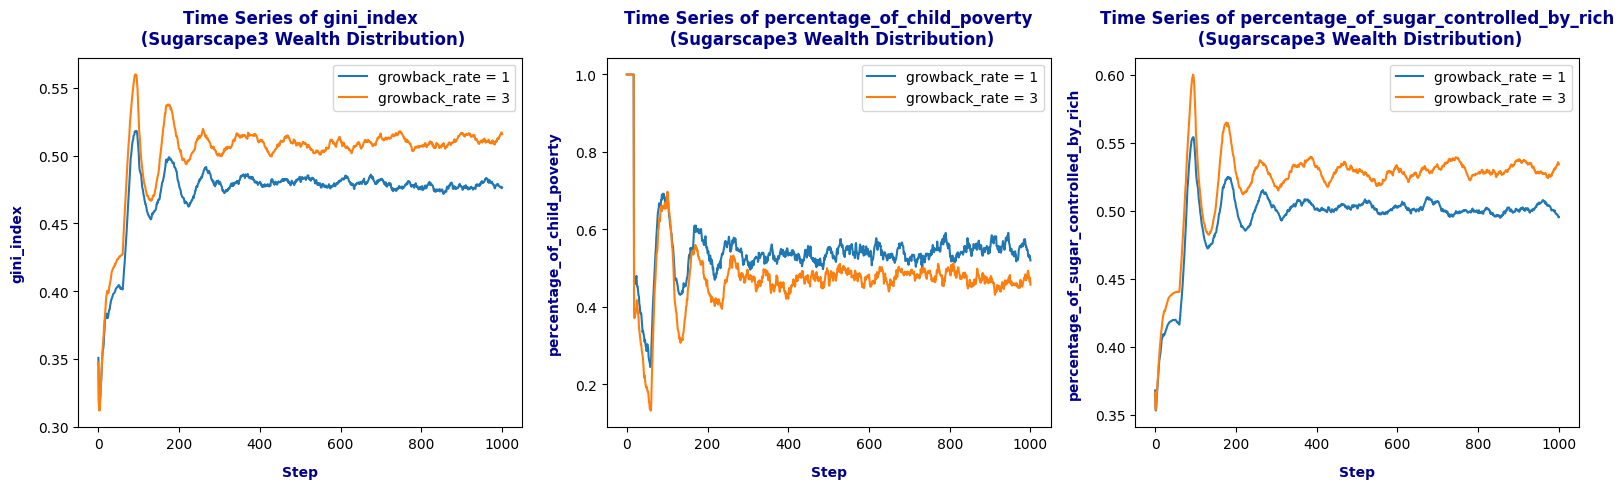

In [199]:
compare_plot(s3_growback_rate, 'growback_rate', output_list, 1, 3)

In [200]:
s3_death_age = s3_grouped_fianl[(s3_grouped_fianl['growback_rate'] == 1) &
                (s3_grouped_fianl['initial_population'] == 400) &
                (s3_grouped_fianl['max_vision'] == 6) &
                (s3_grouped_fianl['max_metabolism'] == 4)]

In [201]:
for output in output_list:
    Wilcoxon_rank_sum(s3_death_age, 'min_death_age', output, 1, 60)

0.48893265463909535
0.4728149333588104
Statistic: 31.252747572454794
P-value: 2.048636862952455e-214
There is a significant difference in gini_index between the groups because of min_death_age.
0.6386675824175824
0.541968031968032
Statistic: 34.97390281780322
P-value: 5.610592812300895e-268
There is a significant difference in percentage_of_child_poverty between the groups because of min_death_age.
0.5187986751745489
0.49534447624987044
Statistic: 32.342788414730514
P-value: 1.7521944133780953e-229
There is a significant difference in percentage_of_sugar_controlled_by_rich between the groups because of min_death_age.


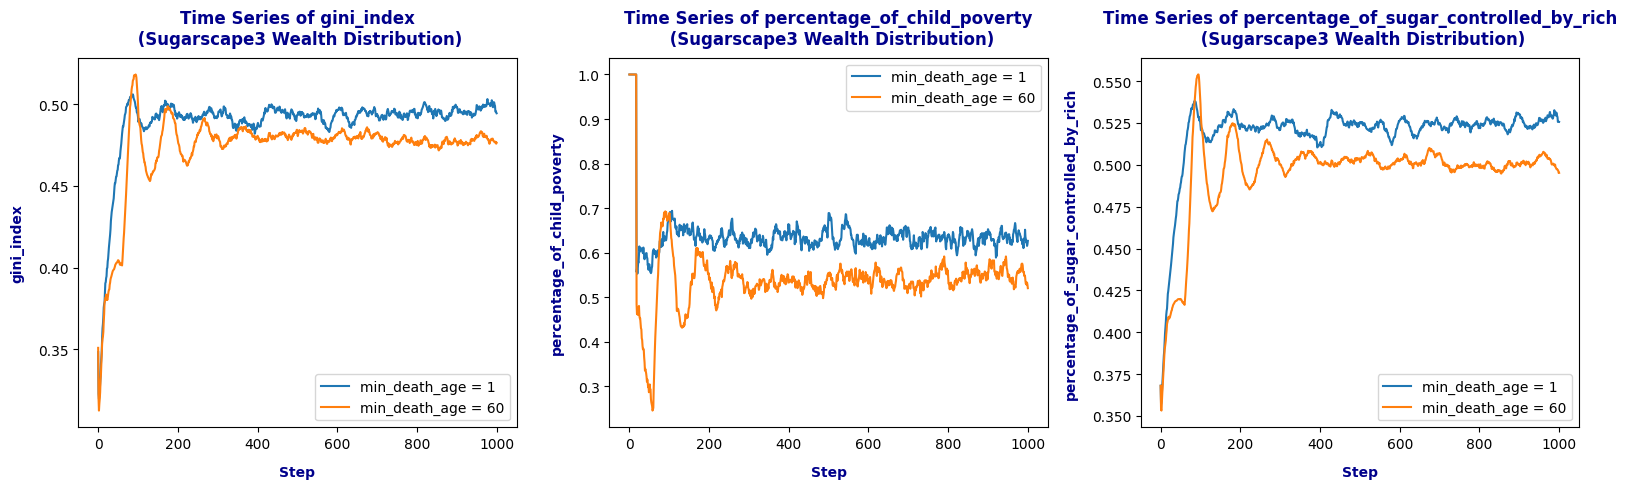

In [202]:
compare_plot(s3_death_age, 'min_death_age', output_list, 1, 60)

In [203]:
s3_vision = s3_grouped_fianl[(s3_grouped_fianl['growback_rate'] == 1) &
                (s3_grouped_fianl['min_death_age'] == 60) &
                (s3_grouped_fianl['initial_population'] == 400) &
                (s3_grouped_fianl['max_metabolism'] == 4)]

In [204]:
for output in output_list:
    Wilcoxon_rank_sum(s3_vision, 'max_vision', output, 6, 10)

0.4728149333588104
0.4538573971327449
Statistic: 30.414706666688723
P-value: 3.510601323120614e-203
There is a significant difference in gini_index between the groups because of max_vision.
0.541968031968032
0.5911725774225773
Statistic: -27.109904185420145
P-value: 7.52541581516888e-162
There is a significant difference in percentage_of_child_poverty between the groups because of max_vision.
0.49534447624987044
0.4815361855252279
Statistic: 27.663120983750403
P-value: 1.9405478152467999e-168
There is a significant difference in percentage_of_sugar_controlled_by_rich between the groups because of max_vision.


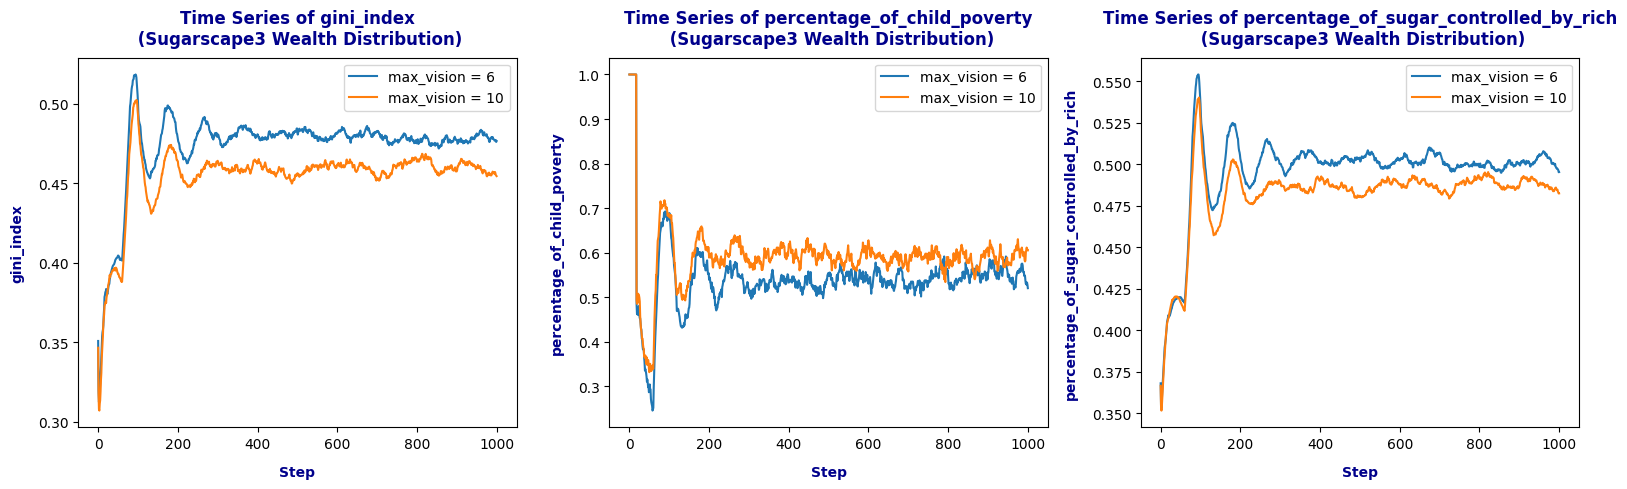

In [205]:
compare_plot(s3_vision, 'max_vision', output_list, 6, 10)

In [206]:
s3_metabolism = s3_grouped_fianl[(s3_grouped_fianl['growback_rate'] == 1) &
                (s3_grouped_fianl['min_death_age'] == 60) &
                (s3_grouped_fianl['max_vision'] == 6) &
                (s3_grouped_fianl['initial_population'] == 400)]

In [207]:
for output in output_list:
    Wilcoxon_rank_sum(s3_metabolism, 'max_metabolism', output, 4, 10)

0.4728149333588104
0.49992854904323575
Statistic: -31.963512658799292
P-value: 3.5065312495934085e-224
There is a significant difference in gini_index between the groups because of max_metabolism.
0.541968031968032
0.6357017982017983
Statistic: -32.45023054783274
P-value: 5.376184219394454e-231
There is a significant difference in percentage_of_child_poverty between the groups because of max_metabolism.
0.49534447624987044
0.5207245358573093
Statistic: -30.67296987256238
P-value: 1.3057211788059648e-206
There is a significant difference in percentage_of_sugar_controlled_by_rich between the groups because of max_metabolism.


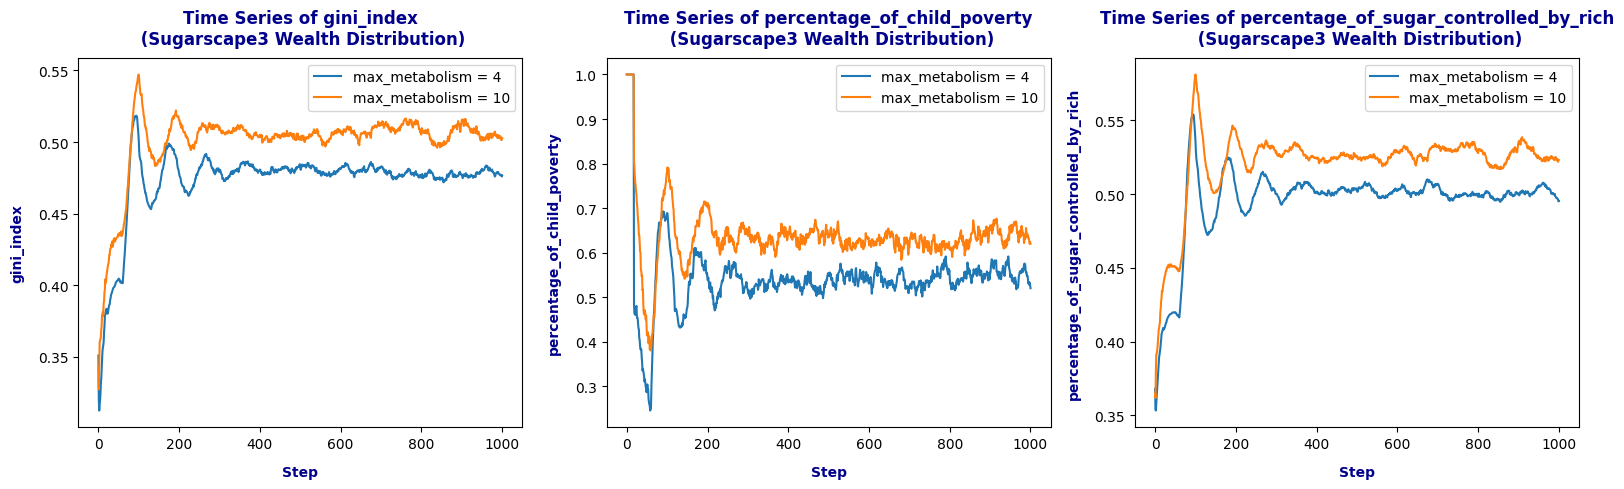

In [208]:
compare_plot(s3_metabolism, 'max_metabolism', output_list, 4, 10)